Classification - Decision Tree

Reference:
http://scikit-learn.org
https://stackoverflow.com

In [1]:
#IMPORTING REQUIRED DATASET
from sklearn.datasets import load_wine
# LOAD WINE DATASET
raw_data = load_wine()
#DISPLAY CLASS
list(raw_data.target_names)

['class_0', 'class_1', 'class_2']

In [2]:
#DATA DISPLAY
print(raw_data)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [3]:
#IMPORTING REQUIRED LIBRARY
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz 
import pydotplus
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
#CONVERTING TO DATAFRAME
dataFrameWine=pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
dataFrameWine['target'] = pd.Series(raw_data.target)
#DISPLAY FIRST 5 RECORDS
print(dataFrameWine.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [5]:
#CLASS VALUES
print(dataFrameWine.target.unique())

[0 1 2]


In [6]:
#DISPLAY LAST 5 RECORDS
dataFrameWine.tail(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [7]:
#SPLITTING THE DATA in ratio 70 and 30
X_train, X_test, y_train, y_test = train_test_split(raw_data.data, raw_data.target, test_size=0.3)

In [8]:
#Checking Shape
X_train.shape

(124, 13)

In [9]:
#APPLYING GINI CLASSIFIER
clf_gini = DecisionTreeClassifier(criterion = "gini") #clf_entropy for GINI CLASSIFIER
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
#APPLYING ENTROPY CLASSIFIER
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, #clf_entropy for ENTROPY CLASSIFIER
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

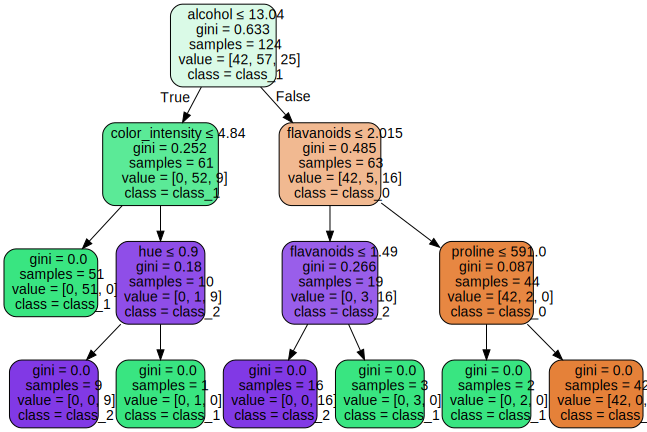

In [29]:
#GINI AND VISUALIZATION OF GINI DECISION TREE 
dataFrameWine['class']=dataFrameWine['target'].map(lambda var: raw_data['target_names'][var])

wine_df_data = dataFrameWine.drop(['class','target'],axis=1)

dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                         feature_names=wine_df_data.columns.values,  
                         class_names=dataFrameWine['class'].unique(),  
                         filled=True, rounded=True,  
                         special_characters=True,)  
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"180,6!"')
pydot_graph.write_png('GiniDT.png')
graphGini = graphviz.Source(pydot_graph.to_string())
graphGini


ENTROPY DECISION TREE 


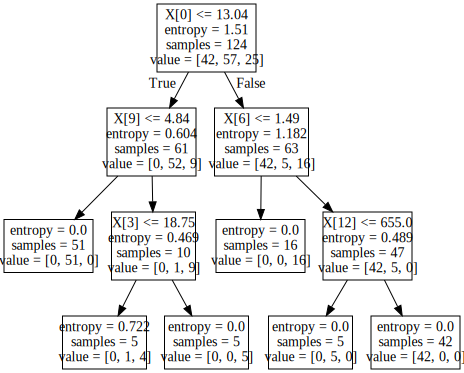

In [21]:
#ENTROPY AND VISUALIZATION OF ENTROPY DECISION TREE
dot_data = tree.export_graphviz(clf_entropy,out_file=None)
pydotplus.graph_from_dot_data(dot_data)
graph = graphviz.Source(dot_data)  
print('ENTROPY DECISION TREE ')
graph

In [30]:
#CONFUSION MATRIX AND CLASSIFICATION REPORT FOR ENTROPY
y_pred=clf_entropy.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=raw_data.target_names))

[[15  2  0]
 [ 0 12  2]
 [ 0  4 19]]
             precision    recall  f1-score   support

    class_0       1.00      0.88      0.94        17
    class_1       0.67      0.86      0.75        14
    class_2       0.90      0.83      0.86        23

avg / total       0.87      0.85      0.86        54



In [31]:
#CONFUSION MATRIX AND CLASSIFICATION REPORT FOR ENTROPY
y_pred=clf_gini.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=raw_data.target_names))

[[15  2  0]
 [ 0 13  1]
 [ 0  4 19]]
             precision    recall  f1-score   support

    class_0       1.00      0.88      0.94        17
    class_1       0.68      0.93      0.79        14
    class_2       0.95      0.83      0.88        23

avg / total       0.90      0.87      0.88        54

